<a href="https://colab.research.google.com/github/Napawan2005/Machine-Learning-68/blob/main/%E0%B8%97%E0%B8%B3%E0%B8%94%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B9%80%E0%B8%95%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prepareation

## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pprint import pprint
from fnmatch import fnmatchcase

In [2]:
import warnings
warnings.filterwarnings('ignore') # Ignore any warning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,  log_loss,
    confusion_matrix, ConfusionMatrixDisplay, recall_score,
    balanced_accuracy_score, make_scorer, precision_score,
    f1_score, roc_auc_score, average_precision_score)

from imblearn.metrics import classification_report_imbalanced
from sklearn.utils.class_weight import compute_class_weight

In [4]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler, SMOTEN, SMOTENC, KMeansSMOTE
from imblearn.combine import SMOTEENN

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [6]:
from sklearn.base import clone
from fnmatch import fnmatchcase
from collections import Counter, defaultdict
from math import ceil

In [7]:
sns.set(style='darkgrid')

### load dataset

In [8]:
import kagglehub
from pathlib import Path

# Download Dataset from Kaggle
dataset_path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

file_path = Path(dataset_path)
file_path = file_path / 'fetal_health.csv'

Using Colab cache for faster access to the 'fetal-health-classification' dataset.


In [9]:
# Set Random SEED
SEED = 42

In [10]:
data = pd.read_csv(file_path)
display(data)
data.info()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# เช็คข้อมูลเป็น null

In [11]:
pprint(f"Data Shape: {data.shape}")
pprint(f"Missing values: {data.isnull().sum().sum()}")

'Data Shape: (2126, 22)'
'Missing values: 0'


## เช็คค่าซ้ำกัน


In [12]:
data.duplicated().sum()

np.int64(13)

## มีการลบค่าที่ซ้ำกัน

In [13]:

print("ขนาดก่อนลบ:", data.shape)
data = data.drop_duplicates(keep="first")
print("ขนาดหลังลบ:", data.shape)

ขนาดก่อนลบ: (2126, 22)
ขนาดหลังลบ: (2113, 22)


In [14]:
# Counts per class (sorted by feature label)
pprint(data['fetal_health'].value_counts(sort=True))

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64


In [15]:
# Percentage per class
pprint(data['fetal_health'].value_counts(normalize=True, sort=True)
     .mul(100).round(4))

fetal_health
1.0    77.8987
2.0    13.8192
3.0     8.2821
Name: proportion, dtype: float64


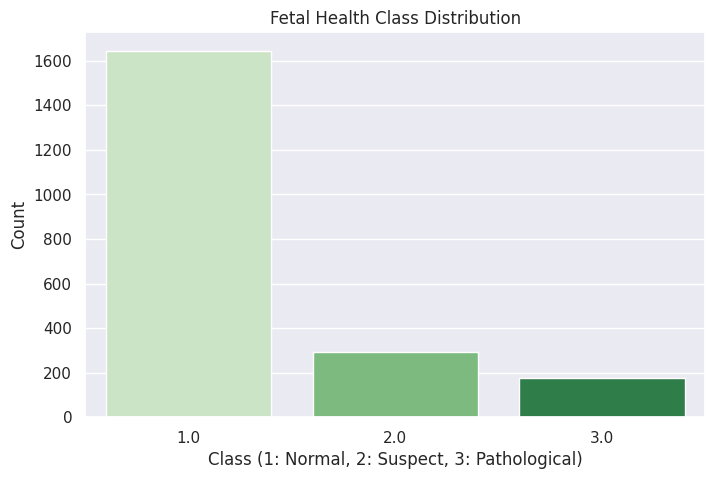

In [16]:
# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='fetal_health', data=data, palette='Greens')
plt.title('Fetal Health Class Distribution')
plt.xlabel('Class (1: Normal, 2: Suspect, 3: Pathological)')
plt.ylabel('Count')
plt.show()

# นำข้อมูลแบ่ง เทรน เทส

In [17]:
X = data.drop(columns=['fetal_health']).copy()
y = data['fetal_health']

In [18]:
print(X.shape, y.shape)

(2113, 21) (2113,)


### เช็คว่า คอลัมน์ target ('fetal_health') ไม่ได้ปะปนอยู่ใน X (ชุดฟีเจอร์)

In [19]:
assert 'fetal_health' not in X.columns

## fn ทำ DataSplit

# setup Stratified

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

## นำข้อมูลเข้า model

In [21]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

หาว่าเข้าโมเดลตัวไหนฉลาดสุด

**max_features =**<br>

--- ใช้ฟิวเจอร์สุ่มต่อโหนดสุ่ม ---

- *"sqrt"* = ดีเป็นค่าเริ่มสำหรับ classification (ลดการพึ่งพาฟีเจอร์เดิม ๆ ทำให้ต้นไม้หลากหลายขึ้น) ⌊√p⌋
- *"log2"* = สุ่มน้อยกว่า "sqrt" → ความหลากหลายสูงขึ้นอีก (variance ↓ มาก, แต่ bias ↑ ได้) ⌊log₂(p)⌋<br>

--- ทุกฟิวเจอร์ --

- *None* = ความหลากหลายของต้นลดลง, เสี่ยง overfit มากขึ้น, ช้าลง

-- ค่าคงที่ ---

- *int* = (เช่น max_features=10) → ใช้ฟีเจอร์สุ่ม คงที่ k ตัว ต่อโหนด

กำหนดจำนวนตรง ๆ

--- ต่อสัดส่วน ---

- *float(0-1)* = (เช่น max_features=0.3) → ใช้ สัดส่วนของฟีเจอร์ต่อโหนด = ⌊p × fraction⌋

เช่น p=64, 0.3 → ⌊19.2⌋ = 19


--- ไม่รู้ใส่ auto ---

- "auto" = เลิกใช้/Deprecated ในเวอร์ชันใหม่:

สำหรับ classifier เคยเท่ากับ "sqrt"

แนะนำ อย่าใช้ ให้ระบุ "sqrt" ตรง ๆ




**ตั้งยังไง “ให้เหมาะ”**

- เริ่มที่ "sqrt" สำหรับ classification (จุดสมดุลดีมากโดยทั่วไป)

- ถ้าโมเดลยัง overfit / อยากเพิ่มความหลากหลายของป่า → ลองลดลงเป็น "log2" หรือ ค่า float เล็กลง (เช่น 0.2–0.3)

- ถ้าฟีเจอร์ น้อยมาก หรือ เกี่ยวข้องสูงหลายตัว → เพิ่มเป็น ค่ามากขึ้น (เช่น 0.7 หรือ None) เพื่อให้แต่ละโหนดเห็นข้อมูลมากขึ้น

- ถ้า p ใหญ่และไร้สาระเยอะ → ใช้ "sqrt" หรือแม้กระทั่ง "log2" เพื่อกันแตกแขนงตาม noise และให้เทรนเร็วขึ้น

- ใช้ CV ตัดสิน: ใส่ในกริดแล้วดู f1_macro/balanced_accuracy และเวลาเทรน

In [22]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform  # ใช้แจกแจงต่อเนื่อง/จำนวนเต็ม
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

อันนี้ตัวหลักการใช้ ใช้RandomizedSearchCV มีการสุ่ม แล้วหาค่าที่ดีที่สุด

In [23]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint, loguniform  # ติดตั้ง scipy แล้ว
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_distributions = {
    "n_estimators": randint(200, 1000),
    "min_samples_leaf" : randint(2,50),
    "max_leaf_nodes" : randint(1,50),
    "min_samples_split" : randint(2,50),

}


rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_features="sqrt",
    class_weight="balanced",  # ถ้าใช้ SMOTE ใน pipeline แนะนำลอง None ด้วยแล้วเทียบ
    bootstrap=True,
    oob_score=True,           # เปิด OOB ได้ แต่อย่าปะปนกับคะแนน CV
    criterion="gini"
)


search = RandomizedSearchCV(
   estimator=rf,
    param_distributions=param_distributions,
    n_iter=80,
    cv=cv,
    scoring={"f1":"f1_macro", "bal_acc":"balanced_accuracy"},
    refit="f1",                  # เลือกโมเดลสุดท้ายด้วย f1_macro
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=False,

)
search.fit(X_train, y_train)
best_model = search.best_estimator_
best_params = search.best_params_
print(best_params)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'max_leaf_nodes': 49, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 503}


In [24]:
best_params = {
    "max_leaf_nodes": 49,
    "min_samples_leaf" : 3,
    "min_samples_leaf": 5,
    "n_estimators": 503,
}

# --- วิธีที่ 1: สร้างโมเดลใหม่ พร้อม base settings ที่ใช้อยู่ ---
rf_final = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",   # ถ้าใช้ SMOTE ใน pipeline ลองเทียบกับ None ได้
    max_features="sqrt",
    bootstrap=True,
    oob_score=True,
    criterion="gini",
)
rf_final.fit(X_train, y_train)
y_pred = search.predict(X_test)

In [25]:
from sklearn.metrics import f1_score, balanced_accuracy_score
print("F1-macro:", f1_score(y_test, y_pred, average="macro"))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))


F1-macro: 0.8903722478836288
Balanced accuracy: 0.892098323132806


In [26]:
# 1) กำหนดพื้นที่การค้นหา (search space)
#param_dist = {
    #"n_estimators": randint(200, 1200),      # จำนวนต้นไม้
    #"max_depth": randint(3, 40),             # ความลึกสูงสุด (หรือจะใส่ [None, ...] ก็ได้)
    #"min_samples_split": randint(2, 20),     # min samples เพื่อแตกโหนด
    #"min_samples_leaf": randint(1, 20),      # min samples ที่ใบ
    #"max_features": ["sqrt", "log2", None],  # เลือกฟีเจอร์ต่อโหนด
    #"bootstrap": [True, False],               # เปิด/ปิด bootstrap
    #"class_weight": [None, "balanced"]        # ถ้า class ไม่สมดุล ลอง 'balanced'
    # ถ้าข้อมูลใหญ่มากและใช้ bootstrap=True จะลอง "max_samples": uniform(0.5, 0.5) ก็ได้
#}

# 2) ตั้งค่า CV: StratifiedKFold + shuffle เพื่อสุ่มสับข้อมูลแต่ละ fold
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) โมเดลฐาน
#rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# 4) Randomized search
#search = RandomizedSearchCV(
    #estimator=rf,
    #param_distributions=param_dist,
    #n_iter=60,                       # จำนวนชุดพารามิเตอร์ที่สุ่มลอง (ปรับตามเวลา/ทรัพยากร)
    #scoring={"roc_auc": "roc_auc", "f1": "f1_macro", "accuracy": "accuracy"},
    #refit="roc_auc",                 # เลือกตัวชนะด้วย roc_auc แล้วฟิตใหม่ทั้งชุด
    #cv=cv,
    #n_jobs=-1,
    #random_state=42,                 # ทำให้การสุ่มของ RandomizedSearchCV reproducible
    #verbose=1,
    #return_train_score=True
#)

# 5) ฝึกและดูผล
#search.fit(X, y)
#print("Best params:", search.best_params_)
##print("Best CV ROC-AUC:", search.best_score_)
#best_model = search.best_estimator_

SyntaxError: unmatched '}' (ipython-input-734416005.py, line 11)